### Load data

In [1]:
import common
import pandas as pd
common.load_clts()
data_df, lects_df = common.load_lexirumah()
display(data_df.head())
display(lects_df.head())




Loading data...
Loaded data.


,ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment,Source
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10]
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10]
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10]
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10]
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10]


,ID,Name,Family,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment,Macroarea
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,"[p/general, p/abui1241-petle]",None,Papunesia
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,"[p/general, p/abui1241-takal]",None,Papunesia
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,"[p/general, p/abui1241-ulaga]",None,Papunesia
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.2109,124.4272,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,"[p/general, p/adan1251-lawah]",None,Papunesia


### Select and combine data

In [2]:
#lects_df = lects_df[["ID", "Name", "Family", "Region", "Latitude", "Longitude"]]
# Filter out proto-languages
lects_df = lects_df[~lects_df["Name"].str.startswith("proto-")]
lects_alorese = lects_df[lects_df["Name"].str.startswith("Alorese")]
# Four Western Lamaholot languages close to Alorese
#lects_lamaholot_related = lects_df[lects_df["Name"].str.contains(
#    "Lamalera|Lewotobi|Lewoingu|Lewolema", case=False, regex=True)]
lects_western_lamaholot = lects_df[lects_df["Iso"].isin(["adr", "lmr", "slp", "ila", "lwt"])]
# Flores-Lembata family, but with preceding WL varieties excluded (and Alorese excluded)
lects_flores_lembata = lects_df[(lects_df["ID"].str.startswith("lama") | lects_df["ID"].str.startswith("sika") | lects_df["ID"].str.startswith("keda")) & ~lects_df.index.isin(lects_western_lamaholot.index)]
# Timor-Alor-Pantar languages, but only Alor-Pantar languages, spoken adjacent to Alorese
lects_alor_pantar = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & lects_df["Region"].str.contains("Alor|Pantar", case=False, regex=True)]
# Other Timor-Alor-Pantor languages, spoken on Timor (and small island Kisar)
lects_timor = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & ~lects_df.index.isin(lects_alor_pantar.index)]
lects_selected_df = pd.concat([lects_alorese, lects_western_lamaholot, lects_flores_lembata, lects_alor_pantar, lects_timor])

# Join data with lect name from lects table
# This order (first select lects, then merge) fastest
data_langs_df = data_df[data_df["Lect_ID"].isin(lects_selected_df["ID"])]
data_langs_df = data_langs_df.rename(columns={"ID":"Form_ID"})
data_merged_df = data_langs_df.merge(lects_df, how="left", left_on="Lect_ID", right_on="ID")
data_merged_df = data_merged_df.drop("ID", axis=1)
display(data_merged_df.head())


,Form_ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment_x,Source,Name,...,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment_y,Macroarea
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia


### Compute phoneme distributions & compute feature matrix per language

In [3]:
#display(data_merged_df[data_merged_df["Lect_ID"]=="alor1247-baran"])
CHARACTER_SEGMENTATION = False
if CHARACTER_SEGMENTATION:
    # perform per-character segmentation
    data_merged_df["Segments_char"] = data_merged_df["Form"].apply(list) # lambda x : [el for el in x if el!="_"]
    segments_col = "Segments_char"
    display(data_merged_df[["Segments", "Segments_char"]].sample(n=50, random_state=24))
else:
    # Use segmentation from dataset (clustering some combinations together)
    segments_col = "Segments_norm"
    data_merged_df["Segments_norm"] = data_merged_df["Segments"].apply(lambda x : common.normalize_list(x, method="soundclass", soundclass_system="asjp"))
    display(data_merged_df[["Segments", "Segments_norm"]].sample(n=50, random_state=24))

data_grouped_lang = data_merged_df.groupby("Lect_ID")
data_agg = data_grouped_lang.aggregate({segments_col:list, "Name": "first", "Family": "first", "Latitude": "first", "Longitude":"first"})
# data_agg["phone_prob"] = data_agg[segments_col].apply(common.phone_prob)
# data_agg["biphone_prob"] = data_agg[segments_col].apply(common.biphone_prob)
# data_agg["phone_prob_existence"] = data_agg[segments_col].apply(common.phone_prob_existence)
# data_agg["biphone_prob_existence"] = data_agg[segments_col].apply(common.biphone_prob_existence)
# display(data_agg.head())

# Effect now is:
# -1 for available biphone,
# -None for combination not available, None for combination and both constitutents not available
# => None replaced by 0
# What Macklin-Cordes does:
# - 1 for available biphone
# - 0 for combination not available, if constituents are available
# - None for combination not available, if constituents not available
phone_prob_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob, "phone_prob")
phone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_existence, "phone_prob_existence")
biphone_prob_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob, "biphone_prob")
biphone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob_existence, "biphone_prob_existence")

phone_prob_boundaries_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_boundaries, "phone_prob_boundaries")
biphone_transition_matrix = common.create_biphone_transition_matrix(biphone_prob_matrix, phone_prob_boundaries_matrix)

display(phone_prob_matrix.head())
display(phone_prob_existence_matrix.head())
display(biphone_prob_matrix.head())
display(biphone_prob_existence_matrix.head())
display(biphone_transition_matrix.head())


,Segments,Segments_norm
12220,"[b, aː, t, _, t, a, f, e]","[b, a, t, t, a, f, e]"
29386,"[p, u, l, u, _, ʋ, o, t, _, t, ə, l, u]","[p, u, l, u, w, o, t, t, I, l, u]"
26412,"[n, a, ʔ, ɪ, r, o, b, a]","[n, a, 7, i, r, o, b, a]"
10544,"[s, a, j, u, r, a]","[s, a, y, u, r, a]"
8206,"[h, i, n, ɑ, l]","[h, i, n, o, l]"
8809,"[ʔ, i, k, ɑ, n]","[7, i, k, o, n]"
41468,"[k, a, nː, a, k, u, ŋ]","[k, a, n, a, k, u, N]"
6263,"[o, s, o, ŋ]","[o, s, o, N]"
33828,"[a, m, i, n, a]","[a, m, i, n, a]"
2455,"[k, a, f, e]","[k, a, f, e]"


,t,q,7,T,m,l,C,y,k,E,...,n,b,d,s,o,+,g,f,N,z
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.076254,NaN,NaN,NaN,0.025589,0.048106,NaN,0.017400,0.084954,NaN,...,0.028147,0.027124,0.014330,0.014841,0.036336,0.013818,NaN,0.022518,0.037359,NaN
abui1241-papun,0.058606,NaN,0.002112,NaN,0.029567,0.036431,NaN,0.020063,0.074446,0.039599,...,0.040127,0.052798,0.013728,0.035375,0.197466,NaN,0.032735,NaN,0.032207,NaN
abui1241-petle,0.053388,NaN,NaN,NaN,0.045175,0.088296,NaN,0.028747,0.067762,0.002053,...,0.039014,0.022587,0.008214,0.014374,0.039014,NaN,0.002053,0.024641,0.055441,NaN
abui1241-takal,0.071483,0.035995,0.001014,NaN,0.037516,0.056781,NaN,0.027376,0.040558,NaN,...,0.038276,0.022814,0.015716,0.010900,0.043093,NaN,0.000253,0.017490,0.037769,NaN
abui1241-ulaga,0.066495,0.000773,0.000258,NaN,0.030928,0.052835,NaN,0.004639,0.064948,0.000773,...,0.045361,0.021392,0.026546,0.016753,0.044072,NaN,0.015979,0.016495,0.040206,NaN


,t,q,7,T,m,l,C,y,k,E,...,n,b,d,s,o,+,g,f,N,z
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,1,NaN,NaN,NaN,1,1,NaN,1,1,NaN,...,1,1,1,1,1,1,NaN,1,1,NaN
abui1241-papun,1,NaN,1,NaN,1,1,NaN,1,1,1,...,1,1,1,1,1,NaN,1,NaN,1,NaN
abui1241-petle,1,NaN,NaN,NaN,1,1,NaN,1,1,1,...,1,1,1,1,1,NaN,1,1,1,NaN
abui1241-takal,1,1,1,NaN,1,1,NaN,1,1,NaN,...,1,1,1,1,1,NaN,1,1,1,NaN
abui1241-ulaga,1,1,1,NaN,1,1,NaN,1,1,1,...,1,1,1,1,1,NaN,1,1,1,NaN


,p,🡄,r,C,t,m,u,r,T,i,...,r,7,q,k,o,n,I,f,r,e
,y,x,k,u,p,o,H,d,🡆,y,...,C,b,u,x,z,🡆,o,E,E,a
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,NaN,NaN,0.002168,NaN,NaN,NaN,0.005637,...,NaN,NaN,NaN,NaN,NaN,0.000867,NaN,NaN,NaN,0.002602
abui1241-papun,NaN,NaN,NaN,NaN,NaN,0.010250,NaN,NaN,NaN,0.007130,...,NaN,NaN,NaN,NaN,NaN,0.004011,NaN,NaN,0.000446,NaN
abui1241-petle,NaN,NaN,NaN,NaN,NaN,0.008418,NaN,NaN,NaN,0.001684,...,NaN,NaN,NaN,NaN,NaN,0.006734,NaN,NaN,NaN,NaN
abui1241-takal,0.000219,NaN,NaN,NaN,NaN,0.002843,NaN,NaN,NaN,0.001969,...,NaN,NaN,0.010499,NaN,NaN,0.002843,NaN,NaN,NaN,0.010936
abui1241-ulaga,NaN,0.006347,NaN,NaN,NaN,0.002845,NaN,0.000875,NaN,0.001313,...,NaN,NaN,NaN,0.000438,NaN,0.002189,NaN,NaN,0.000219,0.002189


,p,🡄,r,C,t,m,u,r,T,i,...,r,7,q,k,o,n,I,f,r,e
,y,x,k,u,p,o,H,d,🡆,y,...,C,b,u,x,z,🡆,o,E,E,a
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-papun,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN
abui1241-petle,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
abui1241-takal,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-ulaga,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,1,...,NaN,NaN,NaN,1,NaN,1,NaN,NaN,1,1


,p,🡄,r,C,t,m,u,r,T,i,...,🔙r,🔙7,🔙q,🔙k,🔙o,🔙n,🔙I,🔙f,🔙r,🔙e
,y,x,k,u,p,o,H,d,🡆,y,...,🔙C,🔙b,🔙u,🔙x,🔙z,🔙🡆,🔙o,🔙E,🔙E,🔙a
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,NaN,NaN,0.115265,NaN,NaN,NaN,0.067497,...,NaN,NaN,NaN,NaN,NaN,0.006549,NaN,NaN,NaN,0.017034
abui1241-papun,NaN,NaN,NaN,NaN,NaN,0.474774,NaN,NaN,NaN,0.063125,...,NaN,NaN,NaN,NaN,NaN,0.029725,NaN,NaN,0.015413,NaN
abui1241-petle,NaN,NaN,NaN,NaN,NaN,0.268212,NaN,NaN,NaN,0.021457,...,NaN,NaN,NaN,NaN,NaN,0.044117,NaN,NaN,NaN,NaN
abui1241-takal,0.020675,NaN,NaN,NaN,NaN,0.099884,NaN,NaN,NaN,0.029157,...,NaN,NaN,0.253873,NaN,NaN,0.023577,NaN,NaN,NaN,0.063315
abui1241-ulaga,NaN,0.048437,NaN,NaN,NaN,0.124670,NaN,0.03461,NaN,0.016598,...,NaN,NaN,NaN,0.026455,NaN,0.016702,NaN,NaN,0.383600,0.013949


### Perform dimensionality reduction

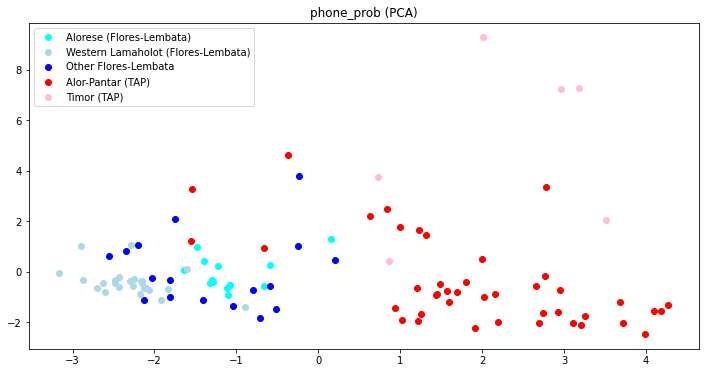

Loadings positive x:


i    0.335528
s    0.297342
y    0.249296
q    0.240055
x    0.213716
t    0.196000
g    0.172875
a    0.129523
z    0.120807
G    0.116963
Name: PC1, dtype: float64

Loadings negative x:


p   -0.372672
I   -0.352717
h   -0.220399
k   -0.206095
H   -0.162474
u   -0.152291
e   -0.112917
w   -0.108072
o   -0.104787
7   -0.099620
Name: PC1, dtype: float64

Loadings positive y:


E    0.413682
o    0.326210
z    0.293012
l    0.251466
Z    0.235049
7    0.234021
h    0.186973
g    0.142689
n    0.114550
C    0.108653
Name: PC2, dtype: float64

Loadings negative y:


a   -0.296024
e   -0.258561
m   -0.178629
d   -0.158973
k   -0.158785
r   -0.154423
x   -0.146011
q   -0.145785
w   -0.137439
y   -0.134602
Name: PC2, dtype: float64

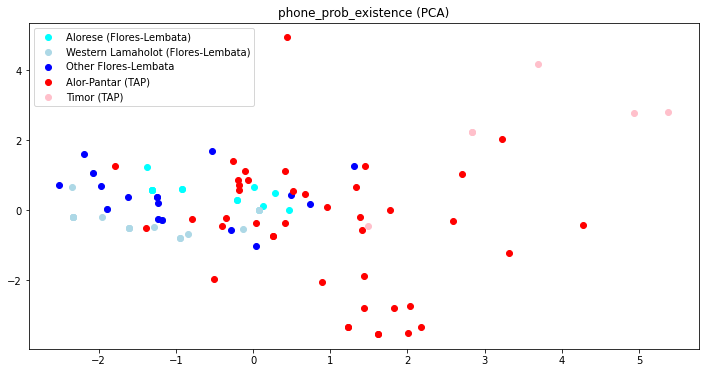

Loadings positive x:


v    0.341920
+    0.333947
z    0.329838
y    0.323090
C    0.295597
E    0.294165
q    0.233976
G    0.226357
x    0.219808
f    0.184401
Name: PC1, dtype: float64

Loadings negative x:


I   -2.236509e-01
H   -1.694520e-01
N   -1.677925e-01
g   -5.593534e-02
e   -4.494223e-02
m   -5.551115e-17
l   -1.387779e-17
i    0.000000e+00
a    0.000000e+00
p    0.000000e+00
Name: PC1, dtype: float64

Loadings positive y:


z    3.258527e-01
Z    3.102323e-01
E    2.760296e-01
C    2.508395e-01
j    1.329163e-01
T    8.409117e-02
G    7.141084e-02
f    7.685809e-03
g    4.638494e-03
a    1.387779e-17
Name: PC2, dtype: float64

Loadings negative y:


q   -0.474285
x   -0.461636
h   -0.235411
7   -0.235176
+   -0.144195
y   -0.131477
w   -0.099944
H   -0.089474
v   -0.081244
N   -0.080175
Name: PC2, dtype: float64

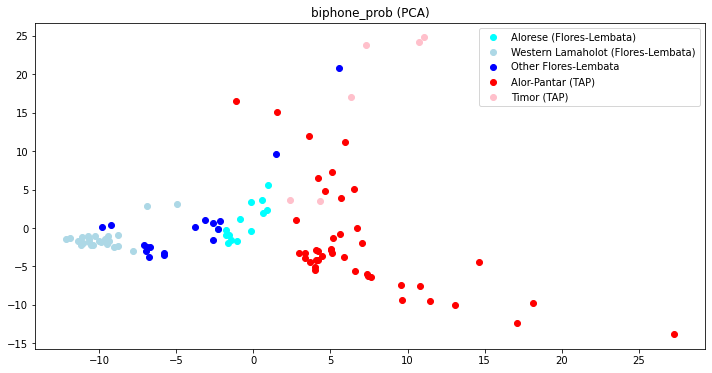

Loadings positive x:


i  b    0.082847
   s    0.080687
a  r    0.075988
q  a    0.075473
r  n    0.075199
l  🡆    0.073685
🡄  y    0.072424
   q    0.072073
a  q    0.072036
s  r    0.069795
Name: PC1, dtype: float64

Loadings negative x:


I  r   -0.101417
   l   -0.099591
b  I   -0.098458
l  I   -0.097772
p  I   -0.096089
e  🡆   -0.094190
r  I   -0.092576
k  I   -0.092343
w  I   -0.090664
I  p   -0.090120
Name: PC1, dtype: float64

Loadings positive y:


E  n    0.124278
   l    0.122149
t  E    0.120945
l  E    0.117210
m  E    0.114124
E  m    0.111909
   p    0.109761
n  E    0.109040
E  t    0.105581
p  E    0.104603
Name: PC2, dtype: float64

Loadings negative y:


r  a   -0.072826
e  t   -0.067628
m  e   -0.065835
w  a   -0.065365
a  t   -0.063759
   w   -0.062775
q  a   -0.062208
m  a   -0.062041
e  l   -0.060845
a  q   -0.060464
Name: PC2, dtype: float64

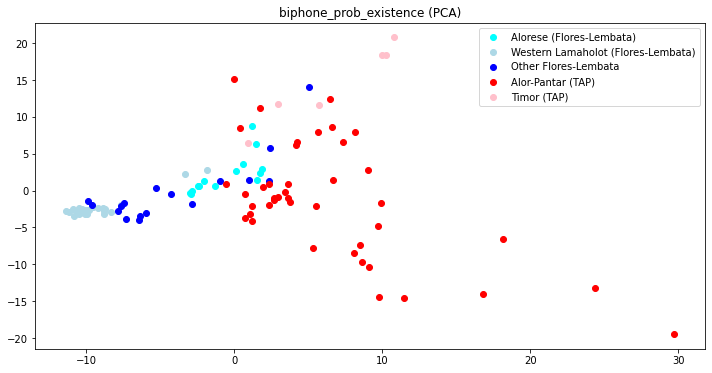

Loadings positive x:


i  b    0.088899
u  p    0.078280
q  🡆    0.075214
   a    0.074906
i  y    0.074779
   s    0.073981
🡄  q    0.073093
q  o    0.073093
   u    0.073093
a  q    0.073093
Name: PC1, dtype: float64

Loadings negative x:


l  I   -0.090430
🡄  I   -0.089768
I  p   -0.083683
a  o   -0.080816
r  I   -0.079887
I  k   -0.077484
   b   -0.075550
n  I   -0.075503
a  e   -0.075388
I  g   -0.075257
Name: PC1, dtype: float64

Loadings positive y:


7  E    0.107317
E  🡆    0.099707
   m    0.097410
   n    0.097337
t  E    0.095237
E  h    0.095145
r  E    0.094442
l  E    0.092110
E  7    0.092097
🡄  E    0.091084
Name: PC2, dtype: float64

Loadings negative y:


q  u   -0.087541
   o   -0.087541
a  q   -0.087541
🡄  q   -0.087541
q  a   -0.087446
   🡆   -0.085451
   e   -0.078865
r  q   -0.076539
i  q   -0.076477
u  q   -0.075476
Name: PC2, dtype: float64

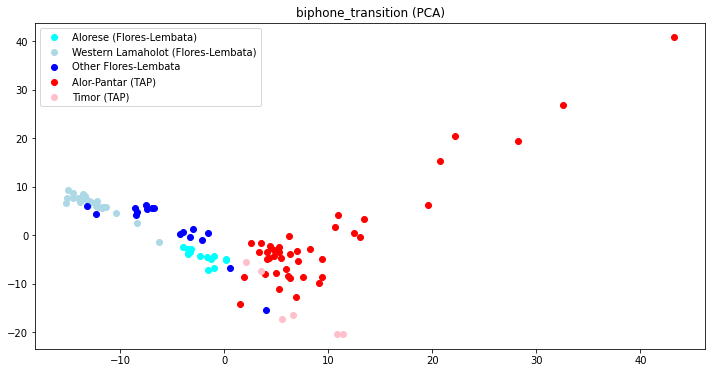

Loadings positive x:


l   🡆     0.064245
🔙q  🔙a    0.063779
o   m     0.063660
🡄   q     0.062150
a   q     0.061032
i   s     0.060946
🔙i  🔙b    0.060555
q   a     0.059712
🡄   y     0.059053
k   i     0.058362
Name: PC1, dtype: float64

Loadings negative x:


o   🡆    -0.069859
a   🡆    -0.069735
🔙I  🔙r   -0.069135
l   I    -0.067532
🔙e  🔙🡆   -0.066135
🔙🡄  🔙r   -0.065579
e   🡆    -0.065332
b   I    -0.063804
k   I    -0.063751
i   p    -0.063105
Name: PC1, dtype: float64

Loadings positive y:


🔙q  🔙a    0.066159
🔙🡄  🔙p    0.066131
🡄   q     0.065972
🔙r  🔙a    0.065971
I   f     0.065066
t   q     0.064536
🔙w  🔙u    0.063340
s   +     0.062092
🔙y  🔙i    0.062033
🔙t  🔙q    0.062022
Name: PC2, dtype: float64

Loadings negative y:


🔙E  🔙n   -0.066325
r   E    -0.064999
t   E    -0.063760
🔙E  🔙l   -0.063610
    🔙m   -0.062631
l   E    -0.062139
n   E    -0.060876
m   E    -0.060869
i   l    -0.060489
🔙E  🔙k   -0.060465
Name: PC2, dtype: float64

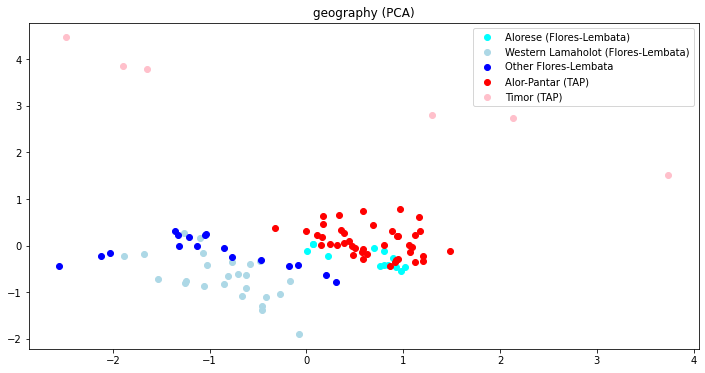

Loadings positive x:


Latitude     0.707107
Longitude    0.707107
Name: PC1, dtype: float64

Loadings negative x:


Longitude    0.707107
Latitude     0.707107
Name: PC1, dtype: float64

Loadings positive y:


Longitude    0.707107
Latitude    -0.707107
Name: PC2, dtype: float64

Loadings negative y:


Latitude    -0.707107
Longitude    0.707107
Name: PC2, dtype: float64

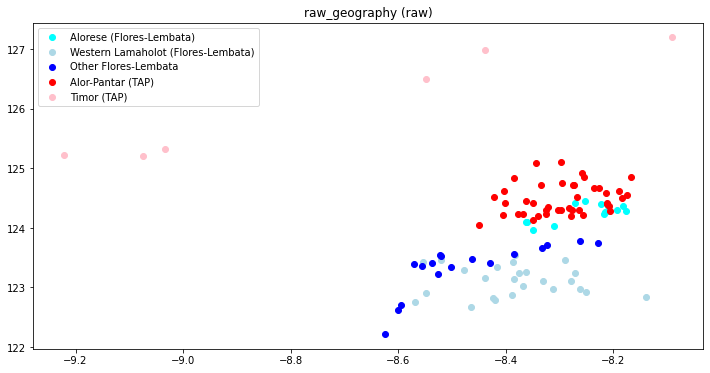

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

PLOT_LABELS = False

# TODO: Biphone prob with transition probabilities

# Define language groups for plots
language_groups = {"Alorese (Flores-Lembata)": {"color": "cyan", "lects": lects_alorese["ID"]},
                   "Western Lamaholot (Flores-Lembata)": {"color": "lightblue", "lects": lects_western_lamaholot["ID"]},
                   "Other Flores-Lembata": {"color": "blue", "lects": lects_flores_lembata["ID"]},
                   "Alor-Pantar (TAP)": {"color": "red", "lects": lects_alor_pantar["ID"]},
                   "Timor (TAP)": {"color": "pink", "lects": lects_timor["ID"]}
                  }

dim_reds_available = {"PCA": PCA(n_components=2)}#,"MDS": MDS()}

analyses = {"phone_prob": phone_prob_matrix,
            "phone_prob_existence": phone_prob_existence_matrix,
            "biphone_prob": biphone_prob_matrix,
            "biphone_prob_existence": biphone_prob_existence_matrix,
            "biphone_transition": biphone_transition_matrix,
            "geography": data_agg[["Latitude", "Longitude"]].fillna(0),
            "raw_geography": ["Latitude", "Longitude"],
            }

for study_label, study_data in analyses.items():
    if study_label == "raw_geography":
        reduce = False
        plot_cols = study_data
        dim_reds = {"raw": plot_cols}
    else:
        reduce = True
        dim_reds = dim_reds_available
    for dr_label, dr in dim_reds.items():
        common.reduce_plot(study_label, study_data, dr_label, dr, data_agg, language_groups, PLOT_LABELS, reduce)
        if dr_label == "PCA":
            loadings_x_pos, loadings_x_neg, loadings_y_pos, loadings_y_neg = common.compute_loadings(dr, study_data.columns)
            print("Loadings positive x:")
            display(loadings_x_pos)
            print("Loadings negative x:")
            display(loadings_x_neg)
            print("Loadings positive y:")
            display(loadings_y_pos)
            print("Loadings negative y:")
            display(loadings_y_neg)
        